In [1]:
include("cutoff.jl")

plot_single_coordinate_over_time (generic function with 1 method)

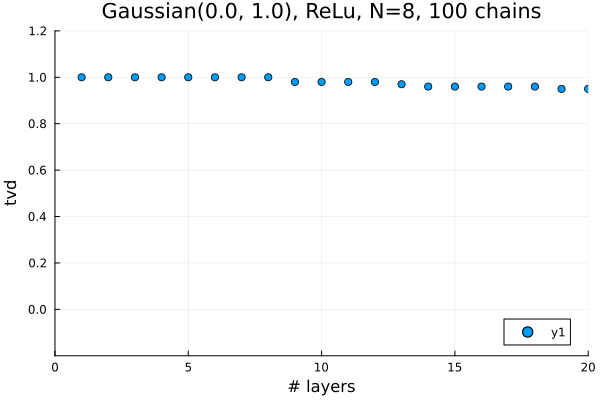

In [17]:
N = 8
X₀ = rand(Uniform(-1, 1), N)
num_chains = 100
# Dist = Uniform(-1/√N, 1/√N)
Dist = Normal(0.0, 1)
# Dist = Normal(0.0, 1/√N)
activation = σ
# activation = tanh
step_size = 0.001
num_steps = 20

Exp = Experiment(X₀, N, num_chains, Dist, activation, step_size, num_steps)
run_and_plot_tvds(Exp, verbose=false)

L2_plotting (generic function with 1 method)

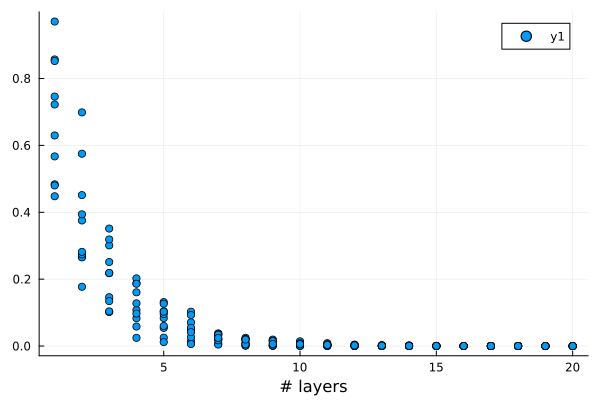

there should be a plot where this compares to tvd for the same runs. This is so that one can see even if tvd is 
far the L2 distance is shrinking for the same runs. this would be an argument to look at L2 distance instead of tvd
for the purpose of seeing how close the run is to 0. For the distribution level, a similar metric would be 
average L2 distance.